### Exportação da Base de Redações

In [1]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
import matplotlib
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument

In [2]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))
df_redacao

Texto   Nota  \
0     Jornais, novelas e anúncios publicitários, a t...  700.0   
1     Em Abril de 2011, um crime sem escrúpulos choc...  450.0   
2     A proibição ou permissão de fumantes em locais...  800.0   
3     Em Abril de 2011, um crime sem escrúpulos choc...  450.0   
4     Política, uma palavra que pode ter uma definiç...  500.0   
...                                                 ...    ...   
2595  O toque de recolher, à noite, imposto aos jove...  750.0   
2596  As manifestações populares podem contribuir pa...  750.0   
2597  Anualmente as universidades brasileiras concen...  650.0   
2598  A cada período eleitoral, surgem campanhas de ...  750.0   
2599  Desde tempos remotos, como na ditadura, que a ...  900.0   

                                               Correção  Competência 1  \
0     Jornais, novelas e anúncios publicitários, a t...          150.0   
1     Em abril de 2011, um crime sem escrúpulos choc...          100.0   
2     A proibição ou permissão de fumantes em locais...          150.0   
3     Em abril de 2011, um crime sem escrúpulos choc...          100.0   
4     Política, uma palavra que pode ter uma definiç...          100.0   
...                                                 ...            ...   
2595  O toque de recolher, à noite, imposto aos jove...          100.0   
2596  As manifestações populares podem contribuir pa...          150.0   
2597  Anualmente as universidades brasileiras concen...          150.0   
2598  A cada período eleitoral, surgem campanhas de ...          150.0   
2599  Desde tempos remotos, como na ditadura, que a ...          200.0   

      Competência 2  Competência 3  Competência 4  Competência 5  \
0             150.0          150.0          150.0          100.0   
1             100.0           50.0          100.0          100.0   
2             200.0          150.0          150.0          150.0   
3             100.0           50.0          100.0          100.0   
4             100.0          100.0          100.0          100.0   
...             ...            ...            ...            ...   
2595          150.0          150.0          150.0          200.0   
2596          150.0          150.0          150.0          150.0   
2597          150.0          100.0          150.0          100.0   
2598          150.0          150.0          150.0          150.0   
2599          150.0          200.0          150.0          200.0   

      Qtd palavras                                            Cadeias  \
0              333  {'Cadeia_1': {'sn': [OrderedDict([('@id', '2')...   
1              328  {'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...   
2              323  {'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...   
3              328  {'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...   
4              255  {'Cadeia_10': {'sn': [OrderedDict([('@id', '10...   
...            ...                                                ...   
2595           291  {'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...   
2596           312  {'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...   
2597           265  {'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...   
2598           345  {'Cadeia_2': {'sn': [OrderedDict([('@id', '2')...   
2599           298  {'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...   

                                               Palavras  \
0     \nJornais \t[jornal] <*> <sem-r> N M P @TOP  #...   
1     \nEm \t[em] <*> PRP @ADVL>  #1->10\nAbril \t[a...   
2     \nA \t[o] <*> <artd> DET F S @>N  #1->2\nproib...   
3     \nEm \t[em] <*> PRP @ADVL>  #1->10\nAbril \t[a...   
4     \nPolítica \t[político] <*> ADJ F S @PRED>  #1...   
...                                                 ...   
2595  \nO \t[o] <clb> <*> <artd> DET M S @>N  #1->2\...   
2596  \nAs \t[o] <*> <artd> DET F P @>N  #1->2\nmani...   
2597  \nAnualmente \t[anualmente] <*> ADV @ADVL>  #1...   
2598  \nA \t[a] <*> PRP @ADVL>  #1->6\ncada \t[cada]...   
2599  \nDesde \t[desde] <

In [4]:
num_redacao = 320
texto = df_redacao['Texto'][num_redacao]
anot_pal = df_redacao['Palavras'][num_redacao]
nota_compt4 = df_redacao['Competência 4'][num_redacao]

print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4}")

print(texto)


Num.: 320
Competência 4: 100.0
Os eventos esportivos dos quais o Brasil será palco são um grande termômetro para o país. Será graças a esses acontecimentos que o Brasil poderá medir muitos aspectos, dentre eles a segurança, que nos dias de hoje é tão precária e ridícula que às vezes chega a ser motivo de piada nas rodas de conversa. Sim, infelizmente o brasileiro parece já ter perdido as esperanças de melhorar a segurança de seu país, mas este vai ser obrigado a rever seus conceitos diante de um mundo, que vai observar e julgar o nosso país.
O ser humano, no seu infinito poder de adaptação ao meio, vem exercendo o seu papel no Brasil,  já estamos acostumados a andar nas ruas de maneira preocupada, sabemos a melhor maneira de se portar diante de um assalto: “não reaja”, é o que dizem os que tinham o dever de nos proteger. Como se o culpado de um assassinato fosse a vítima. Por sorte, no Brasil não é muito provável que sejam relatados casos de terrorismo, e não é isso que devemos temer, 

In [20]:
import split_utils as su

export_redacoes = []
for i,redacao in df_redacao.iterrows():
    #texto = su.split_by_sentence(redacao['Texto'])
    texto = [x for x in redacao['Texto'].split('\n') if len(x) > 0]
    titulo = "REDACAO SEM TITULO"
    notas_compt = [redacao['Competência 1'],
                   redacao['Competência 2'],
                   redacao['Competência 3'],
                   redacao['Competência 4'],
                   redacao['Competência 5']]
    nota_total = redacao['Nota']

    export_redacoes.append([1,
                            titulo,
                            texto,
                            notas_compt,
                            nota_total
                           ])
    

In [21]:
l = "prompt,title,essay,competence,score"
[f'{x}' for x in l.split(',')]

['prompt', 'title', 'essay', 'competence', 'score']

In [22]:
df_export = pd.DataFrame(export_redacoes, columns=['prompt', 'title', 'essay', 'competence', 'score'])
df_export

prompt               title  \
0          1  REDACAO SEM TITULO   
1          1  REDACAO SEM TITULO   
2          1  REDACAO SEM TITULO   
3          1  REDACAO SEM TITULO   
4          1  REDACAO SEM TITULO   
...      ...                 ...   
2595       1  REDACAO SEM TITULO   
2596       1  REDACAO SEM TITULO   
2597       1  REDACAO SEM TITULO   
2598       1  REDACAO SEM TITULO   
2599       1  REDACAO SEM TITULO   

                                                  essay  \
0     [Jornais, novelas e anúncios publicitários, a ...   
1     [Em Abril de 2011, um crime sem escrúpulos cho...   
2     [A proibição ou permissão de fumantes em locai...   
3     [Em Abril de 2011, um crime sem escrúpulos cho...   
4     [Política, uma palavra que pode ter uma defini...   
...                                                 ...   
2595  [O toque de recolher, à noite, imposto aos jov...   
2596  [As manifestações populares podem contribuir p...   
2597  [Anualmente as universidades brasileiras conce...   
2598  [A cada período eleitoral, surgem campanhas de...   
2599  [Desde tempos remotos, como na ditadura, que a...   

                               competence  score  
0     [150.0, 150.0, 150.0, 150.0, 100.0]  700.0  
1      [100.0, 100.0, 50.0, 100.0, 100.0]  450.0  
2     [150.0, 200.0, 150.0, 150.0, 150.0]  800.0  
3      [100.0, 100.0, 50.0, 100.0, 100.0]  450.0  
4     [100.0, 100.0, 100.0, 100.0, 100.0]  500.0  
...                                   ...    ...  
2595  [100.0, 150.0, 150.0, 150.0, 200.0]  750.0  
2596  [150.0, 150.0, 150.0, 150.0, 150.0]  750.0  
2597  [150.0, 150.0, 100.0, 150.0, 100.0]  650.0  
2598  [150.0, 150.0, 150.0, 150.0, 150.0]  750.0  
2599  [200.0, 150.0, 200.0, 150.0, 200.0]  900.0  

[2600 rows x 5 columns]

In [23]:
df_export.to_csv("/home/willian/desenv/master/datasets/essay_br/etd/etd.csv", index=False)

In [5]:
print(f"Total de erros encontrados na execução: {len(resultados['erros'])}")

Total de erros encontrados na execução: 1130


In [6]:
resultados_coesao = resultados['valores_coesao']

In [7]:
comp_notas = pd.DataFrame(df_redacao[['Competência 4']])

# Lista de redacoes com erros
redacoes_erros = [x[0] for x in resultados['erros']]

# Excluir redacoes que deram erro no calculo de coerência
comp_notas.drop(redacoes_erros, inplace=True)

comp_notas['coesao calculada'] = resultados_coesao.values()

comp_notas


Competência 4  coesao calculada
0              50.0            133.75
1             100.0             73.81
2              50.0            100.00
3             100.0             59.48
4              50.0             26.39
...             ...               ...
5068          150.0             35.26
5069          100.0             49.36
5070          150.0             34.58
5073          150.0             91.15
5074          100.0             80.29

[3946 rows x 2 columns]

Junta os valores da Competência 4 com os valores de coesão calculados

In [8]:
comp_notas[comp_notas['coesao calculada'] == 0.0]

Empty DataFrame
Columns: [Competência 4, coesao calculada]
Index: []

O resultado acima mostra que o avaliador automático não atribuiu nota zero para nenhuma das redações. Diferentemento do avaliador que em algumas situações atribuiu esse valor. 

In [9]:
comp_notas['diferenca'] = comp_notas['Competência 4'] - comp_notas['coesao calculada']
comp_notas['diferenca_abs'] = abs(comp_notas['diferenca'])

In [10]:
dif_selecionado = comp_notas[ (comp_notas['diferenca_abs'] < 80.0) ] 
dif_selecionado = dif_selecionado.sort_values(by='diferenca_abs')
dif_selecionado

Competência 4  coesao calculada  diferenca  diferenca_abs
1233          150.0            150.00       0.00           0.00
3734          100.0            100.00       0.00           0.00
3919          150.0            150.00       0.00           0.00
4685          100.0            100.00       0.00           0.00
886           100.0            100.00       0.00           0.00
...             ...               ...        ...            ...
3700          100.0             20.28      79.72          79.72
4651          100.0             20.28      79.72          79.72
2035          150.0             70.14      79.86          79.86
2168          150.0             70.08      79.92          79.92
1869          150.0             70.05      79.95          79.95

[2607 rows x 4 columns]

In [14]:
dif_selecionado[-7:]

Competência 4  coesao calculada  diferenca  diferenca_abs
4808            0.0             79.55     -79.55          79.55
3858            0.0             79.55     -79.55          79.55
3700          100.0             20.28      79.72          79.72
4651          100.0             20.28      79.72          79.72
2035          150.0             70.14      79.86          79.86
2168          150.0             70.08      79.92          79.92
1869          150.0             70.05      79.95          79.95

In [17]:
dif2 = dif_selecionado.iloc[:2600]
dif2.index

Int64Index([1233, 3734, 3919, 4685,  886, 4253, 3678, 1641, 3657, 4332,
            ...
             437, 2701,  812, 1126, 4859, 3910, 1329,  494,  789, 2080],
           dtype='int64', length=2600)

In [20]:
new_df_redacao = pd.DataFrame(df_redacao.iloc[dif2.index])
new_df_redacao[['Nota']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

In [23]:
pickle.dump(new_df_redacao, open("../ccscore/data/Corpus_Redacoes.pickle", 'wb'))


In [14]:
dif_selecionado_neg = comp_notas[ (comp_notas['diferenca'] < 0.0) & (comp_notas['diferenca_abs'] < 80.0)] 
dif_selecionado_neg = dif_selecionado_neg.sort_values(by='diferenca')
dif_selecionado_neg

Competência 4  coesao calculada  diferenca  diferenca_abs
3858            0.0             79.55     -79.55          79.55
4808            0.0             79.55     -79.55          79.55
3656           50.0            129.17     -79.17          79.17
1680          100.0            179.17     -79.17          79.17
4607           50.0            129.17     -79.17          79.17
...             ...               ...        ...            ...
1393           50.0             50.68      -0.68           0.68
4230           50.0             50.60      -0.60           0.60
3279           50.0             50.60      -0.60           0.60
1621          100.0            100.60      -0.60           0.60
2440          100.0            100.26      -0.26           0.26

[655 rows x 4 columns]

In [15]:
dif_selecionado_pos = comp_notas[ (comp_notas['diferenca'] >= 0.0) & (comp_notas['diferenca_abs'] < 80.0) ] 
dif_selecionado_pos = dif_selecionado_pos.sort_values(by = 'diferenca')
dif_selecionado_pos

Competência 4  coesao calculada  diferenca  diferenca_abs
1092          150.0            150.00       0.00           0.00
2537          100.0            100.00       0.00           0.00
4810          150.0            150.00       0.00           0.00
3657          100.0            100.00       0.00           0.00
3734          100.0            100.00       0.00           0.00
...             ...               ...        ...            ...
4651          100.0             20.28      79.72          79.72
3700          100.0             20.28      79.72          79.72
2035          150.0             70.14      79.86          79.86
2168          150.0             70.08      79.92          79.92
1869          150.0             70.05      79.95          79.95

[1952 rows x 4 columns]

Total de linhas: 2607


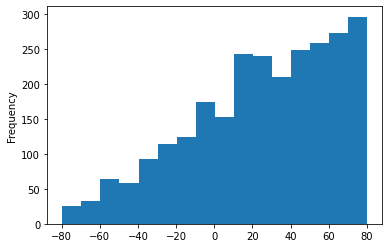

In [16]:
import math
l_bins = list(range(-200,220,20))
w = 10
l_bins = math.ceil((dif_selecionado['diferenca'].max() - dif_selecionado['diferenca'].min())/w)
dif_selecionado['diferenca'].plot.hist(bins = l_bins)
print(f"Total de linhas: {dif_selecionado.shape[0]}")

Acima, temos uma ocorrência muito mais de diferenças positivas. Ou seja, a valoração da coesão, quando comparada com o resultado definido por um humano, está em sua maioria, acima dos valores definidos pelo avaliador humano. 

In [39]:
def annotate_df(row):  
    #ax.annotate(row.name, row.values,
    #            xytext=(10,-5), 
    #            textcoords='offset points',
    #            size=18, 
    #            color='darkslategrey')
    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


NameError: name 'label' is not defined

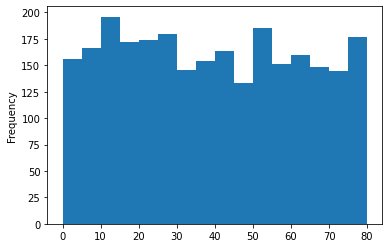

In [43]:
ax = dif_selecionado['diferenca_abs'].plot.hist(bins = l_bins)
_ = dif_selecionado.apply(annotate_df, axis=1)

Acima temos uma distribuição dos valores absolutos da diferença entre os valores atribuidos pelos corretores humanos e o processo avaliação automática. 


In [18]:
dif_selecionado.describe()

Competência 4  coesao calculada    diferenca  diferenca_abs
count    2607.000000       2607.000000  2607.000000    2607.000000
mean      103.927886         79.080771    24.847115      39.105550
std        37.514788         29.161932    38.058907      23.157408
min         0.000000         15.000000   -79.550000       0.000000
25%       100.000000         58.930000    -0.600000      18.750000
50%       100.000000         77.780000    29.170000      38.540000
75%       150.000000         95.725000    56.940000      59.380000
max       200.000000        193.750000    79.950000      79.950000

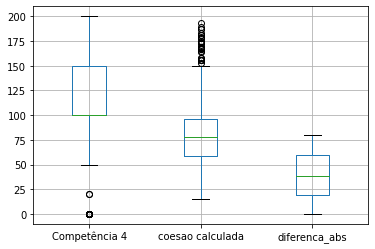

In [19]:
boxplot = dif_selecionado.boxplot(column=['Competência 4', 'coesao calculada', 'diferenca_abs'])

<AxesSubplot:ylabel='Frequency'>

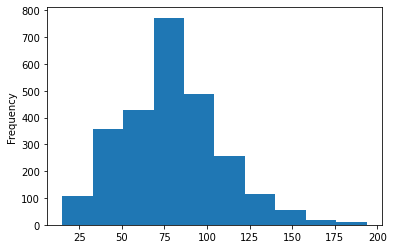

In [32]:
dif_selecionado['coesao calculada'].plot.hist(bins = 10)

<AxesSubplot:ylabel='Frequency'>

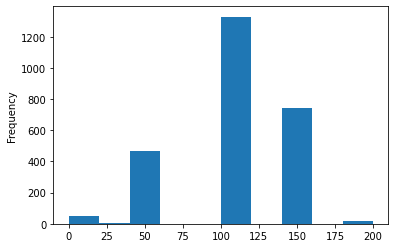

In [33]:
dif_selecionado['Competência 4'].plot.hist(bins = 10)

In [22]:
dif_zero = comp_notas[comp_notas['diferenca'] == 0.0]
print(f"Total de linhas: {dif_zero.shape[0]}")
dif_zero


Total de linhas: 31


Competência 4  coesao calculada  diferenca  diferenca_abs
320           150.0             150.0        0.0            0.0
457           150.0             150.0        0.0            0.0
485           100.0             100.0        0.0            0.0
886           100.0             100.0        0.0            0.0
1041           50.0              50.0        0.0            0.0
1092          150.0             150.0        0.0            0.0
1233          150.0             150.0        0.0            0.0
1641          150.0             150.0        0.0            0.0
1760          100.0             100.0        0.0            0.0
2007          100.0             100.0        0.0            0.0
2537          100.0             100.0        0.0            0.0
3302           50.0              50.0        0.0            0.0
3381           50.0              50.0        0.0            0.0
3477           50.0              50.0        0.0            0.0
3479          100.0             100.0        0.0            0.0
3657          100.0             100.0        0.0            0.0
3678           50.0              50.0        0.0            0.0
3734          100.0             100.0        0.0            0.0
3860          150.0             150.0        0.0            0.0
3874           50.0              50.0        0.0            0.0
3919          150.0             150.0        0.0            0.0
4253           50.0              50.0        0.0            0.0
4332           50.0              50.0        0.0            0.0
4428           50.0              50.0        0.0            0.0
4430          100.0             100.0        0.0            0.0
4608          100.0             100.0        0.0            0.0
4629           50.0              50.0        0.0            0.0
4685          100.0             100.0        0.0            0.0
4810          150.0             150.0        0.0            0.0
4823           50.0              50.0        0.0            0.0
4868          150.0             150.0        0.0            0.0

In [23]:
dif_menor30 = comp_notas[(comp_notas['diferenca'] <= 30.0) & (comp_notas['diferenca'] != 0.0) ]
dif_menor30

Competência 4  coesao calculada  diferenca  diferenca_abs
0              50.0            133.75     -83.75          83.75
1             100.0             73.81      26.19          26.19
2              50.0            100.00     -50.00          50.00
4              50.0             26.39      23.61          23.61
5              50.0             38.97      11.03          11.03
...             ...               ...        ...            ...
5052           50.0             51.88      -1.88           1.88
5053          100.0            110.00     -10.00          10.00
5058           50.0             76.79     -26.79          26.79
5059          100.0             70.00      30.00          30.00
5074          100.0             80.29      19.71          19.71

[1386 rows x 4 columns]

In [24]:
dif_menor50 = comp_notas[(comp_notas['diferenca'] <= 50.0) & (comp_notas['diferenca'] > 30.0)]
dif_menor50

Competência 4  coesao calculada  diferenca  diferenca_abs
3             100.0             59.48      40.52          40.52
6             100.0             65.00      35.00          35.00
21            100.0             53.79      46.21          46.21
32            100.0             69.58      30.42          30.42
46            100.0             66.67      33.33          33.33
...             ...               ...        ...            ...
5043          100.0             60.83      39.17          39.17
5044          100.0             69.70      30.30          30.30
5046          100.0             61.14      38.86          38.86
5061          100.0             59.85      40.15          40.15
5067          150.0            100.76      49.24          49.24

[458 rows x 4 columns]

In [25]:
dif_menor75 = comp_notas[ (comp_notas['diferenca'] <= 75.0) & (comp_notas['diferenca'] > 50.0) ]
dif_menor75

Competência 4  coesao calculada  diferenca  diferenca_abs
8             100.0             37.92      62.08          62.08
18            100.0             41.29      58.71          58.71
24            150.0             78.12      71.88          71.88
25            150.0             94.05      55.95          55.95
36            100.0             48.98      51.02          51.02
...             ...               ...        ...            ...
5060          100.0             47.81      52.19          52.19
5062          150.0             85.26      64.74          64.74
5066          150.0             85.61      64.39          64.39
5069          100.0             49.36      50.64          50.64
5073          150.0             91.15      58.85          58.85

[696 rows x 4 columns]

In [26]:
dif_maior50_menor100 = comp_notas[ (comp_notas['diferenca'] > 75.0) & (comp_notas['diferenca'] < 100.0)] 
dif_maior50_menor100

Competência 4  coesao calculada  diferenca  diferenca_abs
9             150.0             52.27      97.73          97.73
26            100.0             20.00      80.00          80.00
27            100.0             18.33      81.67          81.67
30            150.0             61.25      88.75          88.75
48            150.0             73.08      76.92          76.92
...             ...               ...        ...            ...
5009          150.0             69.85      80.15          80.15
5034          150.0             52.50      97.50          97.50
5047          100.0             19.17      80.83          80.83
5063          150.0             72.02      77.98          77.98
5065          150.0             54.17      95.83          95.83

[591 rows x 4 columns]

In [27]:
dif_maior100 = comp_notas[ comp_notas['diferenca'] >= 100.0] 
dif_maior100

Competência 4  coesao calculada  diferenca  diferenca_abs
19            150.0             50.00     100.00         100.00
20            150.0             30.36     119.64         119.64
23            150.0             28.65     121.35         121.35
31            150.0             45.42     104.58         104.58
40            200.0             86.67     113.33         113.33
...             ...               ...        ...            ...
5014          150.0             41.18     108.82         108.82
5050          200.0             57.74     142.26         142.26
5055          150.0             18.39     131.61         131.61
5068          150.0             35.26     114.74         114.74
5070          150.0             34.58     115.42         115.42

[784 rows x 4 columns]

In [28]:
dif_maior190 = comp_notas[ (comp_notas['coesao calculada'] >= 150.0) & (comp_notas['Competência 4'] >= 150.0) ] 
dif_maior190

Competência 4  coesao calculada  diferenca  diferenca_abs
149           150.0            187.50     -37.50          37.50
291           150.0            155.56      -5.56           5.56
295           150.0            188.89     -38.89          38.89
320           150.0            150.00       0.00           0.00
397           150.0            187.50     -37.50          37.50
457           150.0            150.00       0.00           0.00
673           150.0            172.73     -22.73          22.73
773           150.0            153.12      -3.12           3.12
792           150.0            183.33     -33.33          33.33
1092          150.0            150.00       0.00           0.00
1233          150.0            150.00       0.00           0.00
1255          150.0            175.00     -25.00          25.00
1491          150.0            178.57     -28.57          28.57
1600          150.0            178.12     -28.12          28.12
1641          150.0            150.00       0.00           0.00
2230          150.0            173.86     -23.86          23.86
2275          150.0            193.75     -43.75          43.75
2441          150.0            166.67     -16.67          16.67
2629          150.0            168.75     -18.75          18.75
3420          150.0            180.68     -30.68          30.68
3490          150.0            166.67     -16.67          16.67
3565          200.0            167.61      32.39          32.39
3842          150.0            173.08     -23.08          23.08
3860          150.0            150.00       0.00           0.00
3904          150.0            158.33      -8.33           8.33
3919          150.0            150.00       0.00           0.00
4371          150.0            180.68     -30.68          30.68
4441          150.0            166.67     -16.67          16.67
4516          200.0            167.61      32.39          32.39
4793          150.0            173.08     -23.08          23.08
4810          150.0            150.00       0.00           0.00
4853          150.0            158.33      -8.33           8.33
4868          150.0            150.00       0.00           0.00

In [29]:
nlp = spacy.load('pt_core_news_lg')